### Logistic Relation

In [1]:
# Importing the  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [5]:
dataset=pd.read_csv('C:/Users/LENOVO/titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.shape

(891, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


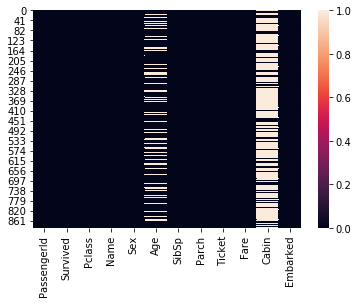

In [8]:
sb.heatmap(dataset.isnull())

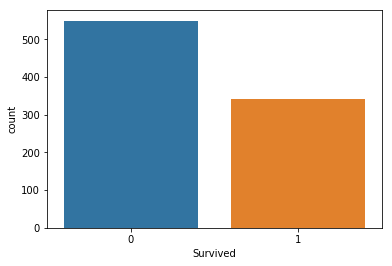

In [9]:
sb.countplot(x='Survived', data=dataset)

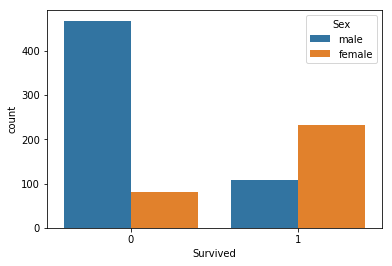

In [10]:
sb.countplot(x='Survived', hue = 'Sex', data=dataset)

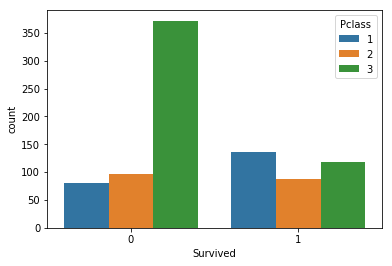

In [11]:
sb.countplot(x='Survived', hue = 'Pclass', data=dataset)

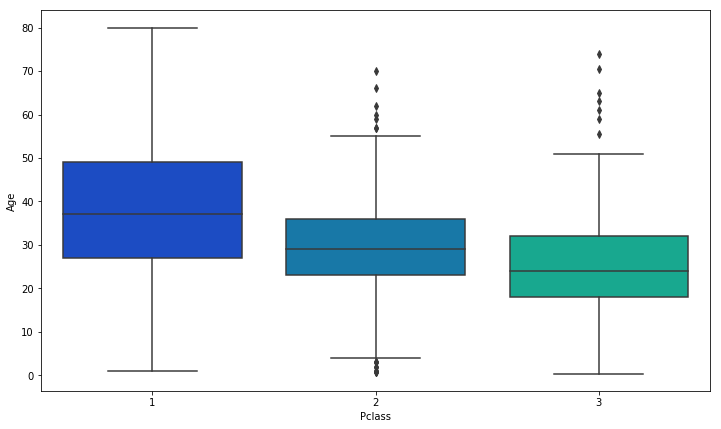

In [12]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass', y='Age', data=dataset, palette='winter')

In [11]:
##median : likely values

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
             return 37
        elif Pclass == 2:
             return 29
        else:
             return 24
    else:
        return Age

In [14]:
dataset['Age']=dataset[['Age','Pclass']].apply(impute_age, axis=1)

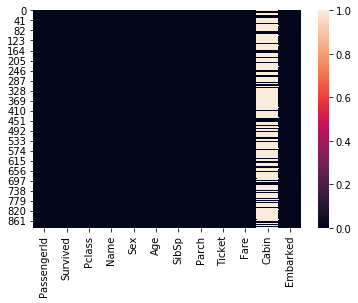

In [24]:
sb.heatmap(dataset.isnull())


In [25]:
dataset.drop('Cabin', axis=1, inplace=True)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [27]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
embark = pd.get_dummies(dataset['Embarked'], drop_first=True)

In [28]:
dataset.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1,inplace=True)

In [29]:
dataset=pd.concat([dataset,sex,embark],axis=1)

In [30]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1),dataset['Survived'], test_size=0.20,
                                                    random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
logmodel.score(X_test,y_test)

0.7988826815642458

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.83      0.69      0.75        80

   micro avg       0.80      0.80      0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [37]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr,color='orange', label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [38]:
probs=logmodel.predict_proba(X_test)
probs

array([[0.69029294, 0.30970706],
       [0.03540376, 0.96459624],
       [0.56386245, 0.43613755],
       [0.82157422, 0.17842578],
       [0.79046302, 0.20953698],
       [0.91948747, 0.08051253],
       [0.63846624, 0.36153376],
       [0.87047527, 0.12952473],
       [0.16243253, 0.83756747],
       [0.43321793, 0.56678207],
       [0.79046302, 0.20953698],
       [0.89744719, 0.10255281],
       [0.36962233, 0.63037767],
       [0.87676435, 0.12323565],
       [0.84613986, 0.15386014],
       [0.91318728, 0.08681272],
       [0.51966055, 0.48033945],
       [0.85431774, 0.14568226],
       [0.84845592, 0.15154408],
       [0.26213815, 0.73786185],
       [0.90445551, 0.09554449],
       [0.93899535, 0.06100465],
       [0.37365922, 0.62634078],
       [0.42160079, 0.57839921],
       [0.92821118, 0.07178882],
       [0.76767623, 0.23232377],
       [0.85061298, 0.14938702],
       [0.78015309, 0.21984691],
       [0.90425618, 0.09574382],
       [0.92319317, 0.07680683],
       [0.

In [39]:
probs=probs[:, 1]
probs

array([0.30970706, 0.96459624, 0.43613755, 0.17842578, 0.20953698,
       0.08051253, 0.36153376, 0.12952473, 0.83756747, 0.56678207,
       0.20953698, 0.10255281, 0.63037767, 0.12323565, 0.15386014,
       0.08681272, 0.48033945, 0.14568226, 0.15154408, 0.73786185,
       0.09554449, 0.06100465, 0.62634078, 0.57839921, 0.07178882,
       0.23232377, 0.14938702, 0.21984691, 0.09574382, 0.07680683,
       0.76158203, 0.90330531, 0.62635683, 0.12981242, 0.07960532,
       0.92019172, 0.10716357, 0.07688143, 0.08356335, 0.38504522,
       0.61386608, 0.56678207, 0.83346184, 0.29168782, 0.17938152,
       0.3621674 , 0.06633852, 0.31024324, 0.09321436, 0.20953698,
       0.75458336, 0.3618085 , 0.72618877, 0.66870465, 0.62635683,
       0.12361167, 0.15324099, 0.14463523, 0.29580151, 0.91360091,
       0.89250791, 0.15175493, 0.06441191, 0.59713744, 0.08231362,
       0.24521646, 0.76657328, 0.61863932, 0.58403169, 0.35638776,
       0.56020709, 0.14651313, 0.14323769, 0.13856433, 0.56619

In [40]:
auc=roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)#%.2 : reference value:place holder

AUC: 0.88


In [41]:
fpr,tpr,thresholds=roc_curve(y_test, probs)

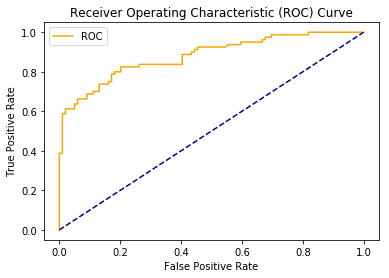

In [42]:
plot_roc_curve(fpr,tpr)